## Question 001

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('ingredient.csv')

In [4]:
# check data
data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [49]:
# check data shape
data.shape
print('Rows and Columns: ', data.shape)

# check numeric 
num_vars = [var for var in data.columns if data[var].dtypes != 'O']
print('Number of numerical variables: ', len(num_vars))

# check missing value
data.isnull().any()

Rows and Columns:  (214, 9)
Number of numerical variables:  9


a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
dtype: bool

In [6]:
# descriptive statistics
data.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [10]:
# identify the distribution
def ingredients_stats(column):
    mean = round(column.mean(), 2)
    median = round(column.median(), 2)
    variance = round(column.var(), 2)
    std_dev = round(column.std(), 2)
    return mean, median, variance, std_dev

table = pd.DataFrame(columns=['Variable', 'Mean', 'Median', 'Variance', 'Standard Deviation'])

for var in num_vars:
    mean, median, variance, std_dev = ingredients_stats(data[var])
    table = table.append({'Variable': var, 'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': std_dev}, ignore_index=True)

print(table)

  Variable   Mean  Median  Variance  Standard Deviation
0        a   1.52    1.52      0.00                0.00
1        b  13.41   13.30      0.67                0.82
2        c   2.68    3.48      2.08                1.44
3        d   1.44    1.36      0.25                0.50
4        e  72.65   72.79      0.60                0.77
5        f   0.50    0.56      0.43                0.65
6        g   8.96    8.60      2.03                1.42
7        h   0.18    0.00      0.25                0.50
8        i   0.06    0.00      0.01                0.10


In [11]:
# perform ANOVA
correlation_matrix = data.corr()
anova_results = stats.f_oneway(data['a'], data['b'], data['c'], data['d'], data['e'], data['f'], data['g'], data['h'], data['i'])

print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nANOVA Results:")
print("F-value:", anova_results.statistic)
print("p-value:", anova_results.pvalue)


Correlation Matrix:
          a         b         c         d         e         f         g  \
a  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
b -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
c -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
d -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
e -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
f -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
g  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
h -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
i  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   

          h         i  
a -0.000386  0.143010  
b  0.326603 -0.241346  
c -0.492262  0.083060  
d  0.479404 -0.074402  
e -0.102151 -0.094201  
f -0.042618 -0.007719  
g -0.112841  0.124968  
h  1.000000 -0.058692  
i -0.058692 

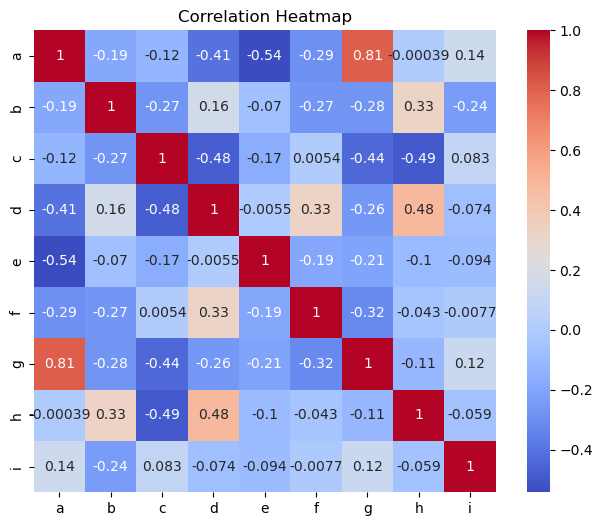

In [12]:
# create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

### Summary:
- The results appear to be at normal shape as mean is near to median, and equal variance, except for variables c and g. 
- The ANOVA F-value is very high and p-value of 0, this suggests that there is a significant difference between the means of the groups being compared.
- The highly positively corelated variables are a and g, while a and e are negatively corelated.

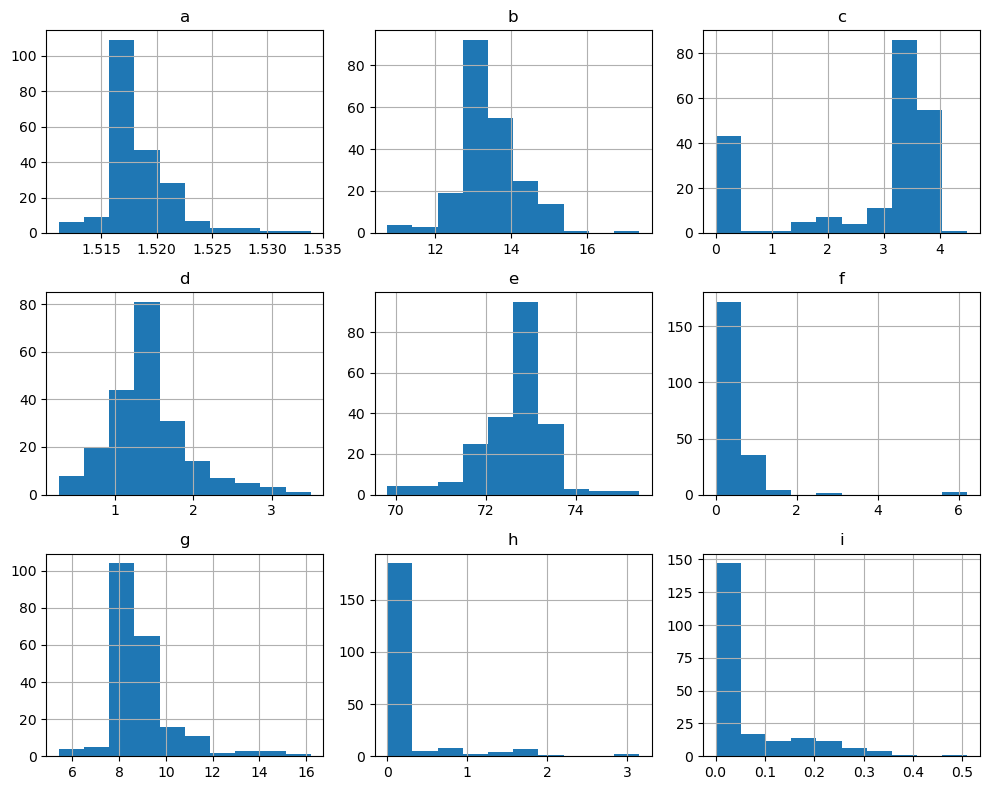

In [13]:
# plot histograms for each additive
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

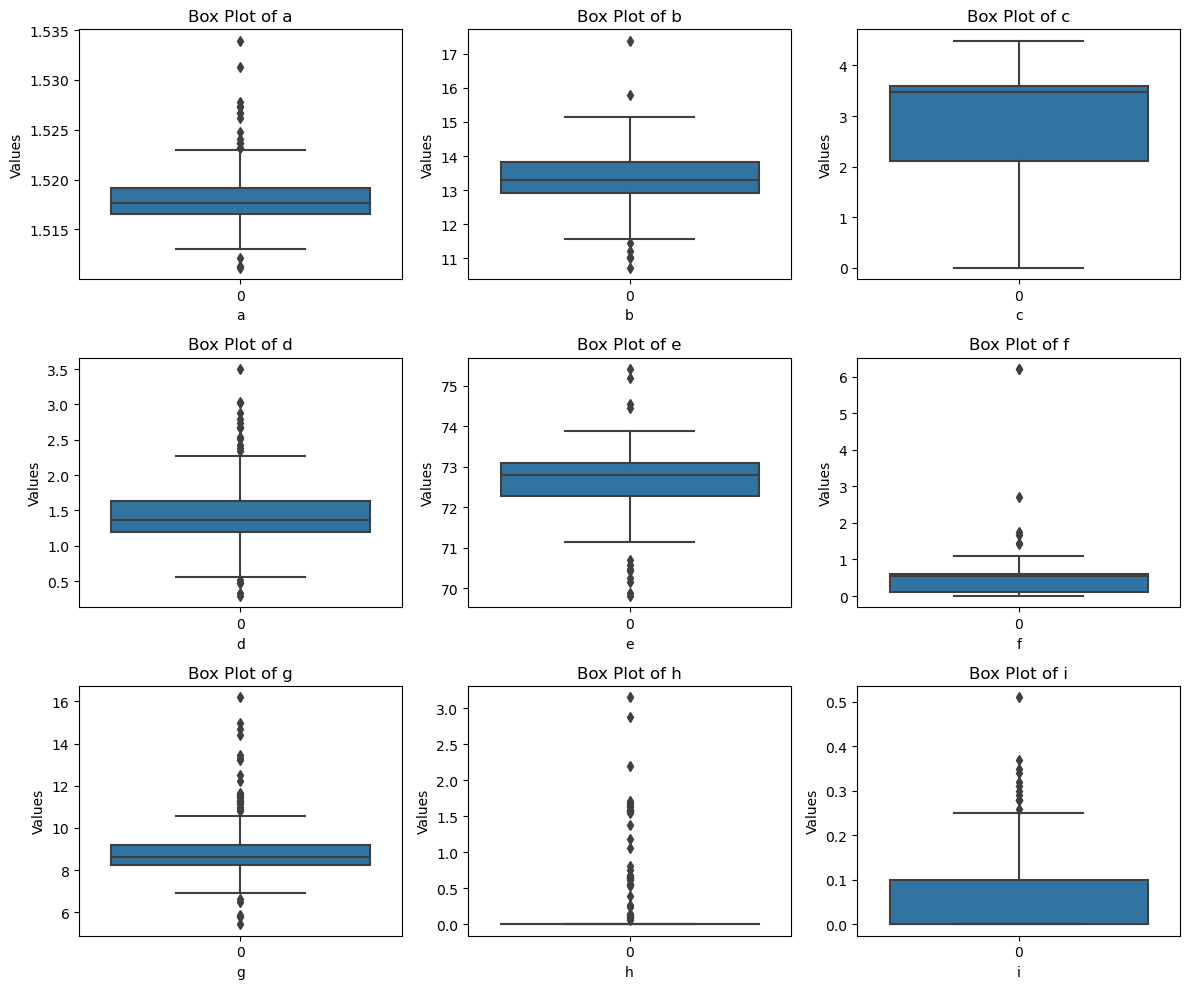

In [14]:
# individual box plots for each additive
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data[column])
    plt.title('Box Plot of {}'.format(column))
    plt.xlabel('{}'.format(column))
    plt.ylabel('Values')
plt.tight_layout()
plt.show()

### Summary:
- The features are normally distributed except for variables f, h and i.
- The variables of a, d, f and g are right-skewed
- The variables of c, h, f and i are zero-inflated
- The variable of c is bi-modal

In [15]:
# calculate Silhouette scores for different numbers of clusters
os.environ['OMP_NUM_THREADS'] = '1'
silhouette_scores = []
table_data = []
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    table_data.append([n_clusters, silhouette_avg])

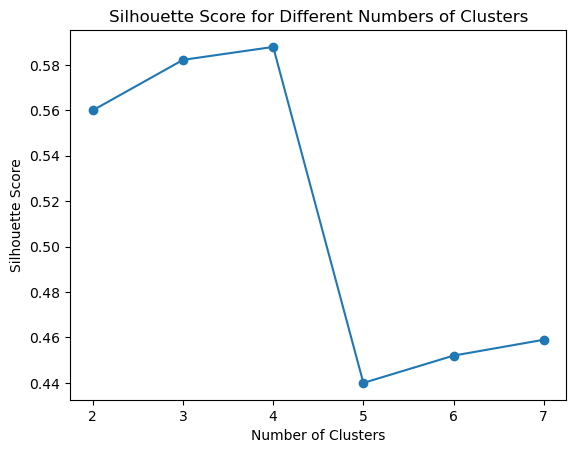

+----------------------+--------------------+
|   Number of Clusters |   Silhouette Score |
+======================+====================+
|                    2 |           0.560027 |
+----------------------+--------------------+
|                    3 |           0.582243 |
+----------------------+--------------------+
|                    4 |           0.587949 |
+----------------------+--------------------+
|                    5 |           0.439951 |
+----------------------+--------------------+
|                    6 |           0.451979 |
+----------------------+--------------------+
|                    7 |           0.45896  |
+----------------------+--------------------+
Number of clusters: 7	Silhouette score: 0.4590


In [16]:
# plot the Silhouette scores
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

headers = ["Number of Clusters", "Silhouette Score"]
print(tabulate(table_data, headers, tablefmt="grid"))
print(f"Number of clusters: {n_clusters}\tSilhouette score: {silhouette_avg:.4f}")

In [39]:
# apply K-means clustering with 4 cluster per Silhouette scores
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data)
cluster_labels = kmeans.labels_
print(cluster_labels)

[2 3 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 3 2 3 2 1 2 2 2 2
 2 2 2 2 1 3 2 3 2 0 2 1 1 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 1 2 2 1 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 3 2 1 2 2 2 2 2 2 2
 2 2 2 1 1 2 2 2 1 2 3 2 2 2 2 3 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 3 2 1 1
 2 2 3 2 2 2 2 2 3 2 2 1 2 2 2 2 1 1 2 2 2 3 2 1 2 2 2 2 1 2 3 3 2 1 1 2 2
 1 3 2 2 2 2 2 1 2 1 2 3 2 2 2 1 3 2 2 2 1 2 2 2 2 2 2 2 0]


In [40]:
# show K-means clustering results 
cluster_counts = np.bincount(cluster_labels)
max_count = np.max(cluster_counts)
max_clusters = np.where(cluster_counts == max_count)[0]

print("Cluster counts:", cluster_counts)
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} data points")
print("Max count:", max_count)
print("Max cluster:", max_clusters)

Cluster counts: [  5  33 159  17]
Cluster 0: 5 data points
Cluster 1: 33 data points
Cluster 2: 159 data points
Cluster 3: 17 data points
Max count: 159
Max cluster: [2]


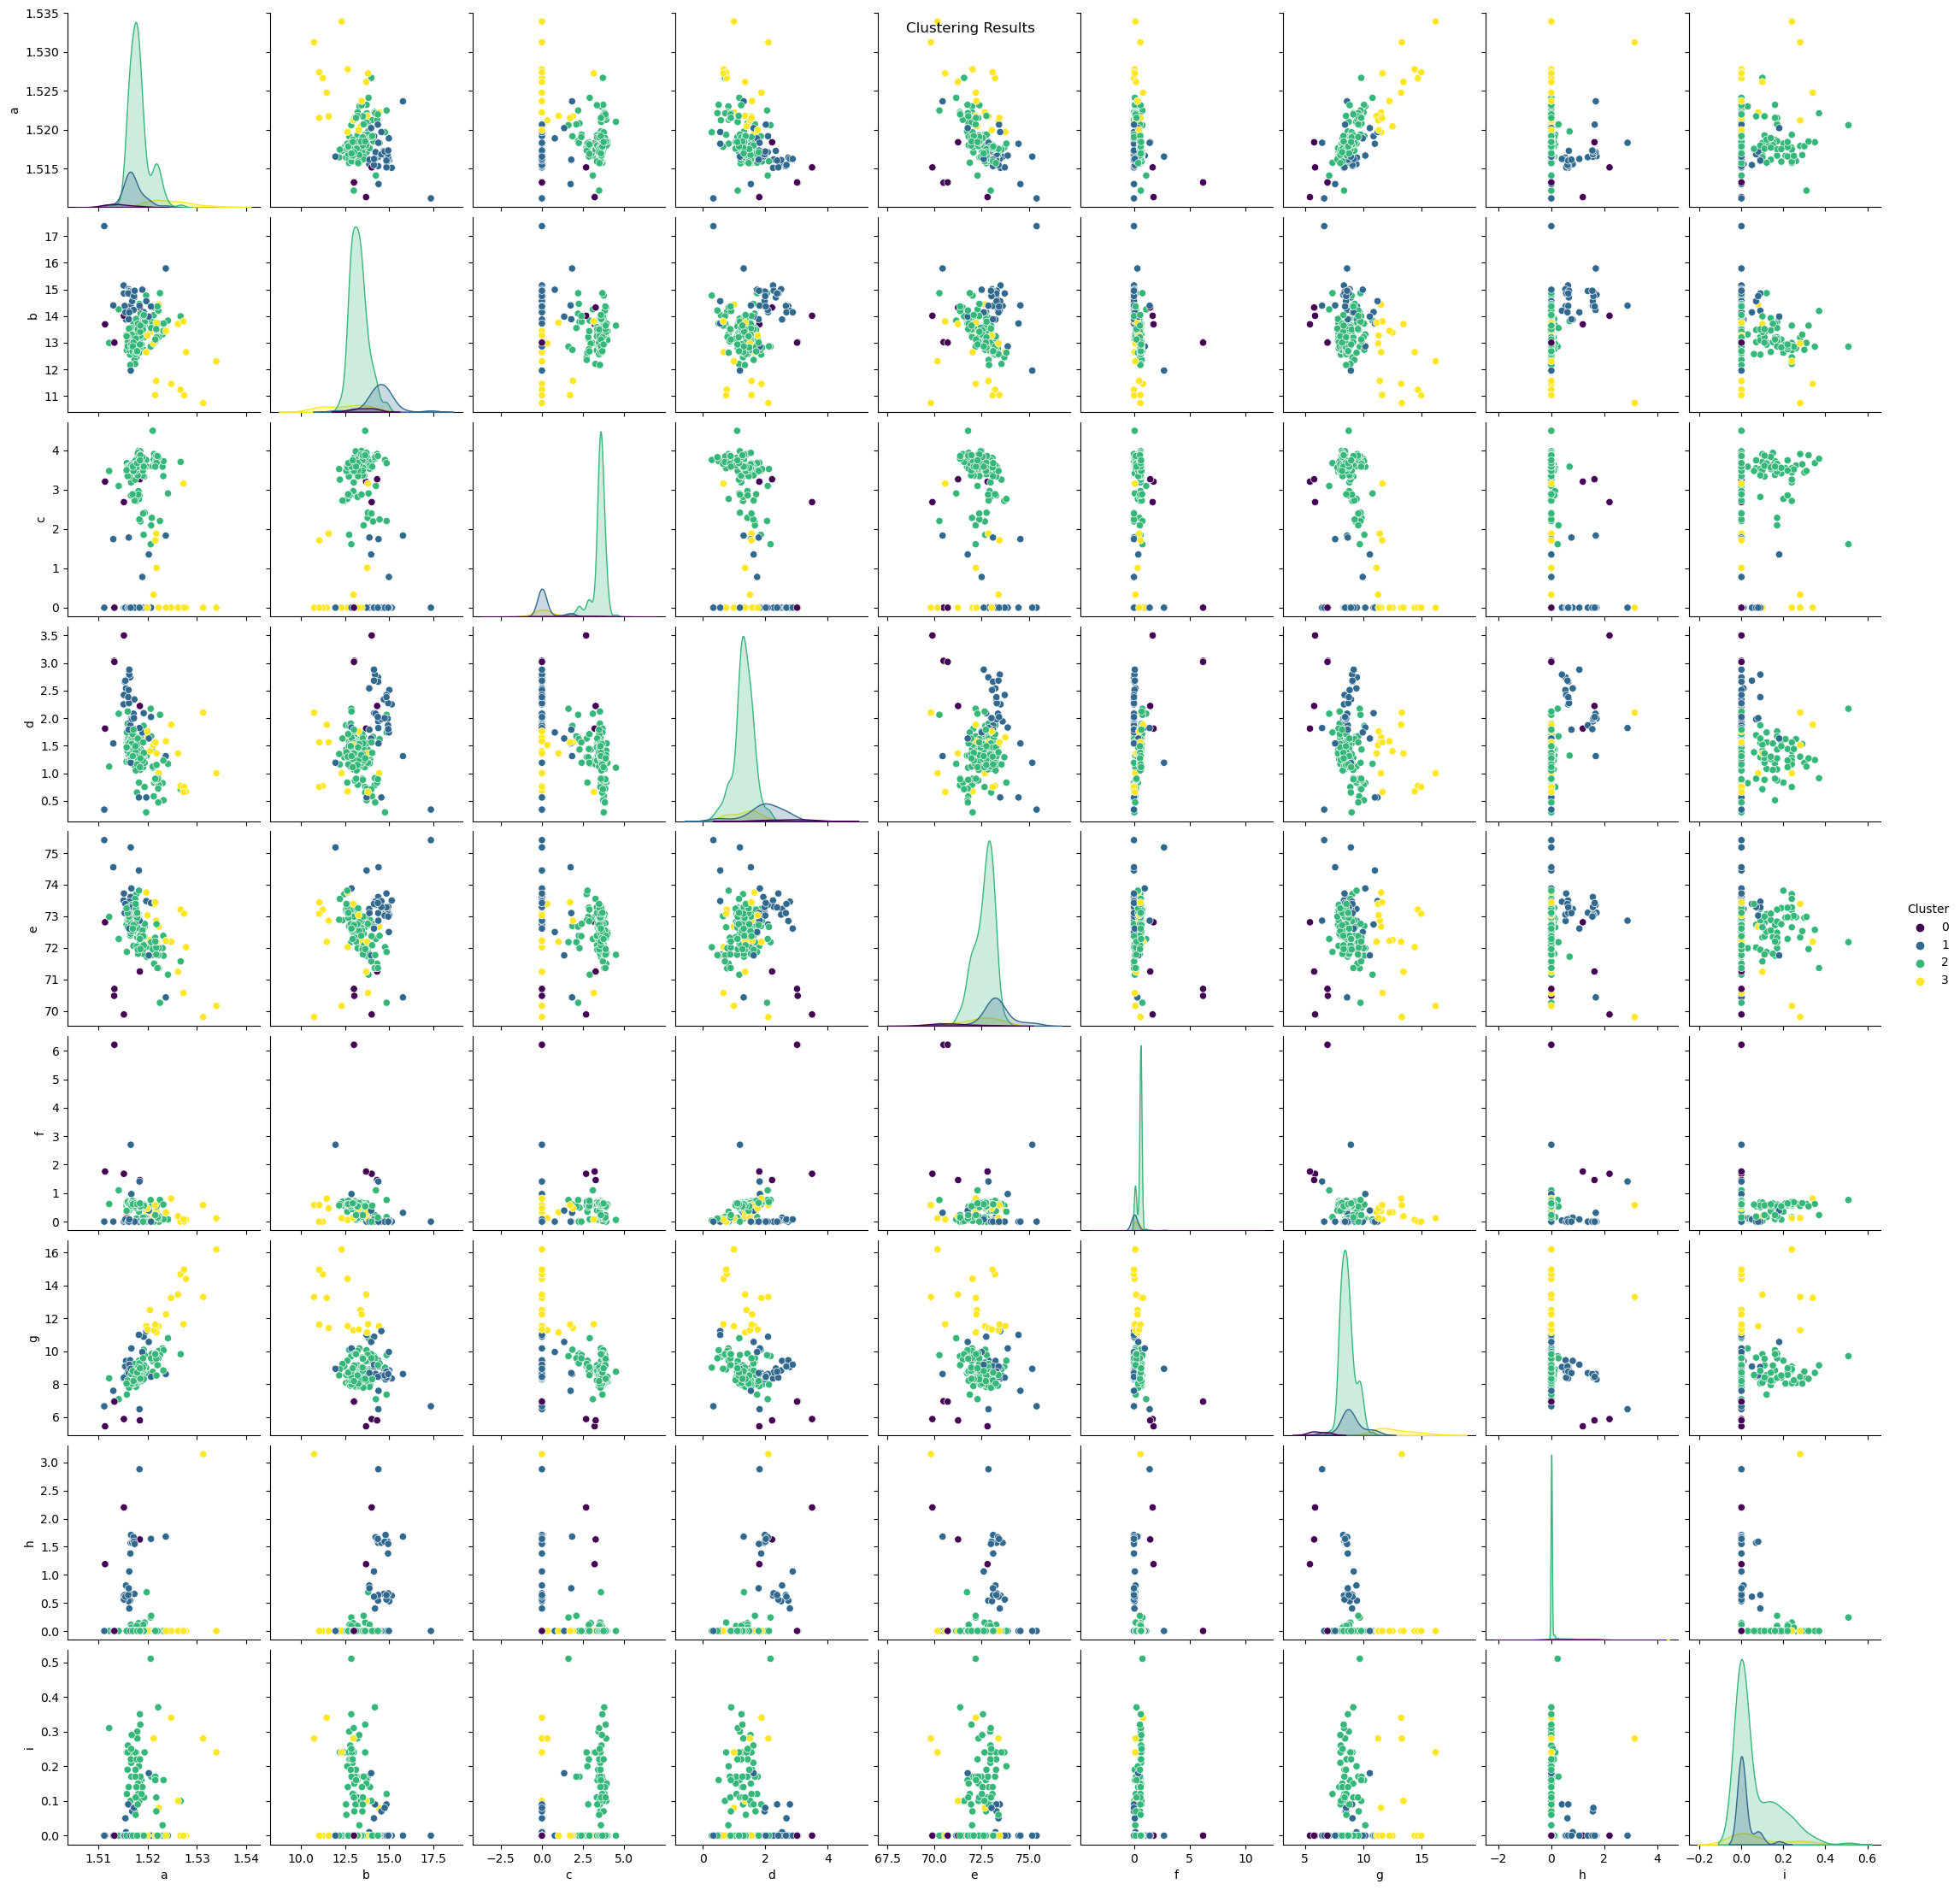

In [41]:
# plot clustering results
data_cluster = data.copy()
data_cluster['Cluster'] = cluster_labels
sns.pairplot(data_cluster, hue='Cluster', palette='viridis')
plt.suptitle('Clustering Results')
plt.show()

In [44]:
# get unique cluster labels and print data points
unique_clusters = data_cluster['Cluster'].unique()

for cluster_label in unique_clusters:
    cluster_data = data_cluster[data_cluster['Cluster'] == cluster_label]
    print(f"Cluster {cluster_label}:")
    print(cluster_data)
    print()

Cluster 2:
           a      b     c     d      e     f      g    h     i  Cluster
0    1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.0  0.07        2
2    1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.0  0.03        2
3    1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.0  0.00        2
4    1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.0  0.00        2
5    1.51721  12.87  3.48  1.33  73.04  0.56   8.43  0.0  0.00        2
..       ...    ...   ...   ...    ...   ...    ...  ...   ...      ...
208  1.51694  12.86  3.58  1.31  72.61  0.61   8.79  0.0  0.00        2
209  1.52152  13.12  3.58  0.90  72.20  0.23   9.82  0.0  0.16        2
210  1.51848  13.64  3.87  1.27  71.96  0.54   8.32  0.0  0.32        2
211  1.51784  12.68  3.67  1.16  73.11  0.61   8.70  0.0  0.00        2
212  1.51841  12.93  3.74  1.11  72.28  0.64   8.96  0.0  0.22        2

[159 rows x 10 columns]

Cluster 3:
           a      b     c     d      e     f      g     h     i  Cluster
1    1.53125  1

In [45]:
# calculate the mean values of each feature within each cluster
cluster_means = data_cluster.groupby('Cluster').mean()

for feature in data_cluster.columns[:-1]:  # exclude the 'Cluster' column
    print(f"Feature: {feature}")
    for cluster_label in unique_clusters:
        cluster_mean = cluster_means.loc[cluster_label, feature]
        print(f"Cluster {cluster_label}: {cluster_mean:.2f}")
    print()

Feature: a
Cluster 2: 1.52
Cluster 3: 1.52
Cluster 0: 1.51
Cluster 1: 1.52

Feature: b
Cluster 2: 13.27
Cluster 3: 12.55
Cluster 0: 13.61
Cluster 1: 14.50

Feature: c
Cluster 2: 3.46
Cluster 3: 0.48
Cluster 0: 1.83
Cluster 1: 0.23

Feature: d
Cluster 2: 1.31
Cluster 3: 1.33
Cluster 0: 2.72
Cluster 1: 1.96

Feature: e
Cluster 2: 72.62
Cluster 3: 72.24
Cluster 0: 71.03
Cluster 1: 73.28

Feature: f
Cluster 2: 0.49
Cluster 3: 0.29
Cluster 0: 3.46
Cluster 1: 0.19

Feature: g
Cluster 2: 8.65
Cluster 3: 12.73
Cluster 0: 6.20
Cluster 1: 8.92

Feature: h
Cluster 2: 0.01
Cluster 3: 0.19
Cluster 0: 1.00
Cluster 1: 0.83

Feature: i
Cluster 2: 0.06
Cluster 3: 0.08
Cluster 0: 0.00
Cluster 1: 0.02



In [46]:
# table cluster_means for review
cluster_means

,a,b,c,d,e,f,g,h,i
Cluster,,,,,,,,,
0,1.514240,13.608000,1.828000,2.718000,71.026000,3.464000,6.196000,1.004000,0.000000
1,1.516908,14.501515,0.226667,1.955455,73.275152,0.188182,8.922727,0.828485,0.017273
2,1.518137,13.266352,3.457799,1.311447,72.616415,0.489874,8.647547,0.012264,0.064843
3,1.524545,12.549412,0.475294,1.327647,72.240000,0.291176,12.729412,0.185294,0.077647


In [47]:
# convert the cluster_means table into a dataframe and display results
data_cluster_means = pd.DataFrame(cluster_means)
result_array = cluster_means.values # convert the cluster_means table into a NumPy array
distinct_formulations = np.unique(result_array, axis=0).shape[0] # calculate the number of unique rows in the result array
distinct_combinations = data_cluster_means.drop_duplicates() # identify the unique combinations of mean values across clusters
print(f"Number of distinct formulations: {distinct_formulations}") # display the number of distinct formulations

Number of distinct formulations: 4


### Summary:
- Silhouette score indicates the number of clusters at 4